# Lectura de datos

In [14]:
#Paquetes para lectura y recuento
from sklearn.datasets import load_digits

#Obtenemos las imágenes
data, target = load_digits(n_class = 10,return_X_y = True)

#Representamos una de las imágenes
print(data[0].reshape(8,8))
print(target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


<function matplotlib.pyplot.show(*args, **kw)>

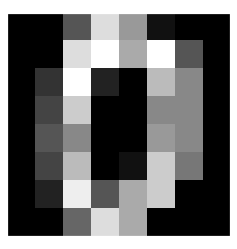

In [15]:
#Paquete para graficar datos
import matplotlib.pyplot as plt

#Métodos para pintar
#Pintamos los píxeles
plt.matshow(data[0].reshape(8,8), cmap = plt.cm.gray)
#Eliminamos los ejes
plt.xticks(())
plt.yticks(())
#Mostramos la gráfica
plt.show

# Sobremuestreo y entrenamiento del modelo

## Analisis de datos

In [16]:
#Contamos los valores

#Inicializacion de la cuenta
ceros = 0
unos = 0
doses = 0
treses = 0
cuatros = 0
cincos = 0
seises = 0
sietes = 0
ochos = 0
nueves = 0

#Cuenta de datos
for x in range(target.shape[0]):
    if target[x] == 0:
        ceros = ceros + 1
    elif target[x] ==1:
        unos = unos + 1
    elif target[x] ==2:
        doses = doses + 1
    elif target[x] ==3:
        treses = treses + 1
    elif target[x] ==4:
        cuatros = cuatros + 1
    elif target[x] ==5:
        cincos = cincos + 1
    elif target[x] ==6:
        seises = seises + 1
    elif target[x] ==7:
        sietes = sietes + 1
    elif target[x] ==8:
        ochos = ochos + 1
    else:
        nueves = nueves + 1

#Representación
print("0: " + str(ceros))
print("1: " + str(unos))
print("2: " + str(doses))
print("3: " + str(treses))
print("4: " + str(cuatros))
print("5: " + str(cincos))
print("6: " + str(seises))
print("7: " + str(sietes))
print("8: " + str(ochos))
print("9: " + str(nueves))

0: 178
1: 182
2: 177
3: 183
4: 181
5: 182
6: 181
7: 179
8: 174
9: 180


## Submuestreo

In [17]:
#Importamos los paquetes
from imblearn.under_sampling import NearMiss

#Inicialización del método NearMiss
nm = NearMiss()

#NearMiss. Elimina las muestras más cercanas de la clase más representada
dataNm, targetNm = nm.fit_resample(data,target)

#Inicializacion de la cuenta
ceros = 0
unos = 0
doses = 0
treses = 0
cuatros = 0
cincos = 0
seises = 0
sietes = 0
ochos = 0
nueves = 0

#Cuenta de datos
for x in range(targetNm.shape[0]):
    if targetNm[x] == 0:
        ceros = ceros + 1
    elif targetNm[x] ==1:
        unos = unos + 1
    elif targetNm[x] ==2:
        doses = doses + 1
    elif targetNm[x] ==3:
        treses = treses + 1
    elif targetNm[x] ==4:
        cuatros = cuatros + 1
    elif targetNm[x] ==5:
        cincos = cincos + 1
    elif targetNm[x] ==6:
        seises = seises + 1
    elif targetNm[x] ==7:
        sietes = sietes + 1
    elif targetNm[x] ==8:
        ochos = ochos + 1
    else:
        nueves = nueves + 1

#Representación
print("0: " + str(ceros))
print("1: " + str(unos))
print("2: " + str(doses))
print("3: " + str(treses))
print("4: " + str(cuatros))
print("5: " + str(cincos))
print("6: " + str(seises))
print("7: " + str(sietes))
print("8: " + str(ochos))
print("9: " + str(nueves))

0: 174
1: 174
2: 174
3: 174
4: 174
5: 174
6: 174
7: 174
8: 174
9: 174


## Obtención de los conjuntos de evaluación y entrenamiento

In [18]:
#Importamos el paquete
from sklearn.model_selection import train_test_split

#Dividimos los datos
dataTrain, dataTest, targetTrain, targetTest = train_test_split(dataNm,targetNm, random_state = 0)

print("Forma de los datos de entreno: " + str(dataTrain.shape))
print("Forma de los datos de evaluación: " + str(dataTest.shape))

Forma de los datos de entreno: (1305, 64)
Forma de los datos de evaluación: (435, 64)


## Red Neuronal

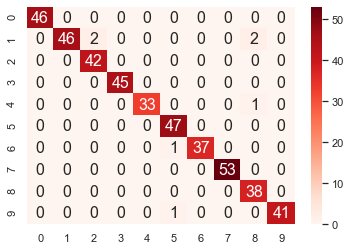

Exactitud MLP:  0.9839080459770115
Memoria MLP:  0.9839080459770115
Precisión MLP:  0.9848093194002122
Puntuación MLP:  0.9839024468727601


In [19]:
#Importamos los paquetes
from sklearn.neural_network import MLPClassifier

#Los pasos son siempre los mismos
#1. Inicialización.
modelMLP = MLPClassifier()

#2. Entrenamiento del modelo
modelMLP.fit(dataTrain, targetTrain)

#3. Predicción con el modelo
targetPred = modelMLP.predict(dataTest)

#4. Muestra de resultados
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(targetPred, targetTest)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

#Evaluación

#Paquete
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Exactitud MLP: ', accuracy_score(targetPred,targetTest))
print('Memoria MLP: ', recall_score(targetPred,targetTest,average='weighted'))
print('Precisión MLP: ', precision_score(targetPred,targetTest,average='weighted'))
print('Puntuación MLP: ', f1_score(targetPred,targetTest,average='weighted'))

## Visualización de los fallos 

Valor real:  5
Valor predicho:  6


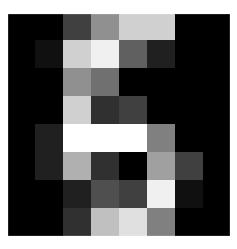

In [22]:
#Obtenemos los errores
errores = dataTest[targetPred != targetTest]
valorReal = targetTest[targetPred != targetTest]
valorPredicho = targetPred[targetPred != targetTest]

#Selección del valor a pintar
nValor = 2

#Pintamos los píxeles
plt.matshow(errores[nValor].reshape(8,8), cmap = plt.cm.gray)
#Eliminamos los ejes
plt.xticks(())
plt.yticks(())
#Mostramos la gráfica
plt.show
print("Valor real: ", valorReal[nValor])
print("Valor predicho: ", valorPredicho[nValor])